## Module 1 Project Submission

Please fill out:
* Student name: Tim Larcher
* Student pace: Self Paced
* Scheduled project review date/time: Wed Jan 23 / 11 am PST
* Instructor name: Eli Thomas
* Blog post URL: https://timlarcher.github.io/exploring_king_county_housing_data


In [1]:
# Load the dataset and explore it.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_orig = pd.read_csv('kc_house_data.csv')
print(df_orig.info())
print(df_orig.head())
print(df_orig.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None
       

In [2]:
df_orig.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Observations:
1. waterfront, view, and yr_renovated contain NaNs. Waterfront appears to be boolean. yr_renovated probably is same as a zero in that column, meaning it hasn't been renovated or there is no record of it. View appears to be useless as almost all values are zero. For our purposes, id is of no value. lat and long and the 15 values could help with more sophisticated methods such as modelling the neighborhoods and surrounding values.

2. Some datatypes need to be converted to clean it up.

3. Grade and condition are sort of categorical, but since they are numeric and continuous it will be easy to graph them against sale price, for example.

4. It is likely that many of the features are colinear.

5. For now I am going to drop all the columns that I don't see a need for now. I can always grab them back later but this makes it easier to see those items that might have a direct affect on prices right now.

Next we will clean up the datatypes, drop columns, fix NaNs, and get another feel for the data with histograms.

In [3]:
df = df_orig.drop(['date','id','view','lat','long','sqft_living15','sqft_lot15'], axis=1)
df.head()
df.waterfront.fillna(0,inplace=True)
df.yr_renovated.fillna(0,inplace=True)
df.waterfront = df.waterfront.astype('int64')
# sqft_basement: This was tricky because the 0.0 string wouldn't convert directly to an int. 
# The to_numeric produced NaNs for some values so those had to be eliminated then all types converted to int.
df.sqft_basement = pd.to_numeric(df.sqft_basement,errors='coerce')
df.sqft_basement.fillna(0,inplace=True)
df.sqft_basement = df.sqft_basement.astype('int64')
df.yr_renovated = df.yr_renovated.astype('int64')
print(df.isna().sum())
df.head()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
dtype: int64


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F05D1A8748>,
      dtype=object)

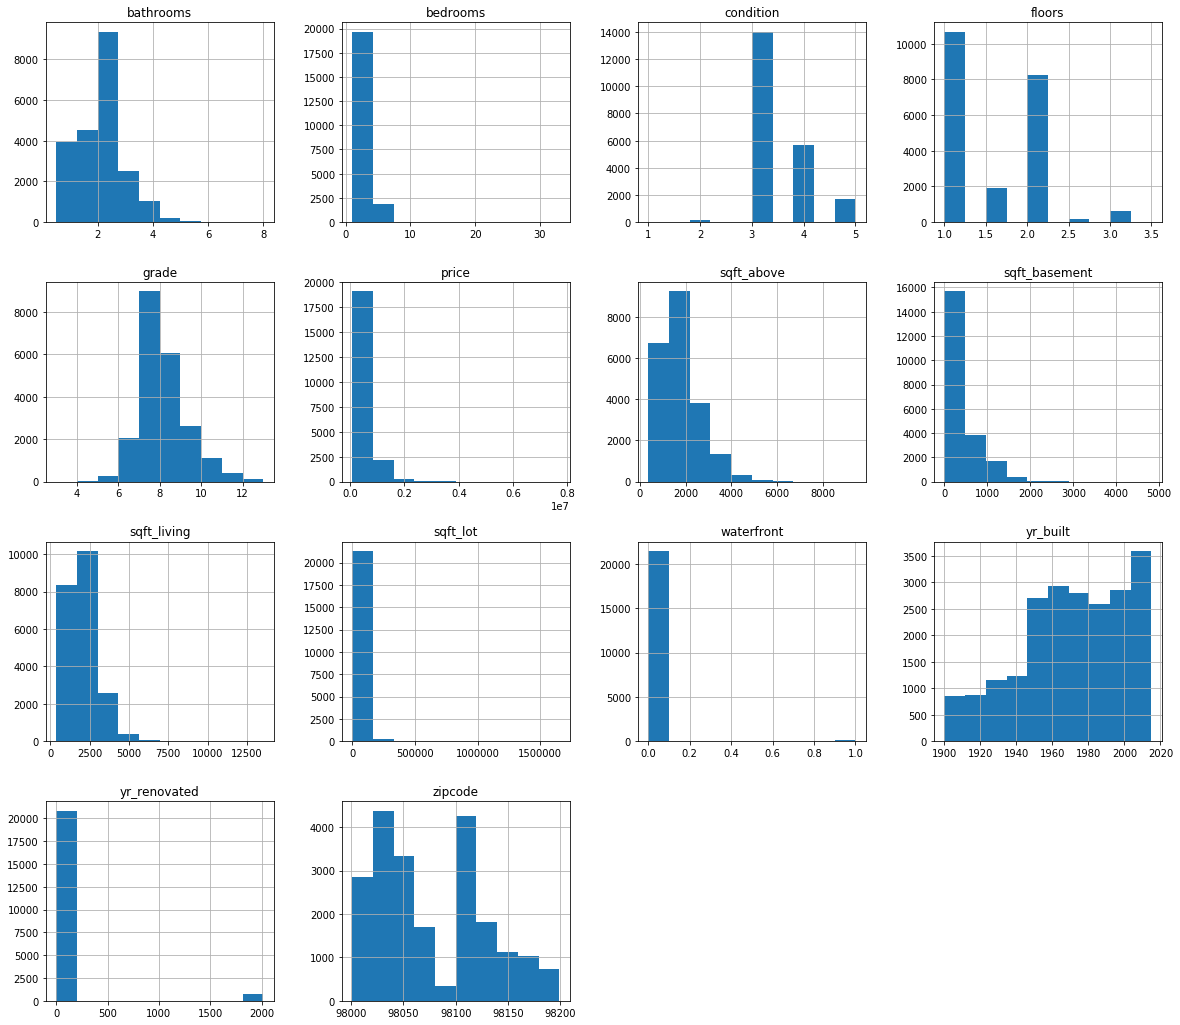

In [4]:
df.hist(figsize=(20,18),bins=10)

In [5]:
print(df.waterfront.value_counts())
print(df.bedrooms.value_counts())
print(df.bathrooms.value_counts())
print(df.yr_renovated.value_counts())

0    21451
1      146
Name: waterfront, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
0       20853
2014       73
2003       31
2013       31
2007       30
2005       29
2000       29
2004       22
1990       22
2009       21
2006       20
1989       20
2002       17
1998       16
1984       16
1991       16
1999       15
2008       15
2010       15
2001       15
1983       15
1986       14
1985       14
1987       14
2015       14
1994       14
1992       13
1

Bedrooms and bathrooms seem pretty normally distributed with a slight skew, and some definate outliers. 33 bedrooms?

About 95% of houses don't have a renovation date so that is going to be a pretty useless column. 

Note that grade and condition seem to be pretty highly correlated, as you would expect.

Next we'll check for colinearity in the features using Seaborn.


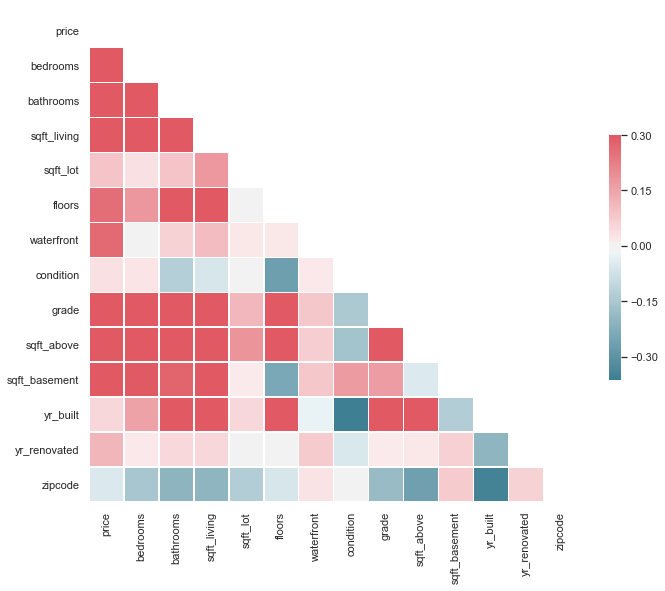

In [6]:
import seaborn as sns

sns.set(style='white') # Visualization style
corr = df.corr() # Create covariance matrix from the dataframe.
# Generate a mask the size of our covariance matrix:
mask = np.zeros_like(corr,dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette( 220, 10, as_cmap=True )
sns.heatmap( corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
			 square=True, linewidths=0.5, cbar_kws={'shrink': 0.5} )


From this it appears that our assumption above was true - that many of these features are colinear. The real question will be which ones are the best predictor of house value. Bedrooms, bathrooms, sqft_living, grade, sqft_living, sqft_basement, and floors all seem highly colinear. Interestingly condition and grade are not that colinear which is counter intuitive I think.

These are the most likely fields to base our train test model. It might be interesting to split out the waterfront from non-waterfront and get an idea of what value waterfront adds to otherwise similar houses. Ditto for breaking the data down by zip code. 

We'll use joint plots to look for linear relationships between these and the sales price. For fun I am going to do one for each feature even though they might seem to have no relationship just to see what they show. I am also treating what might be considered categorical data (such as condition and grade) as numerical since they are numeric already and they can be plotted against price.

We'll do scaling later when we perform the multiple regression modelling.


C:\Users\timla\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


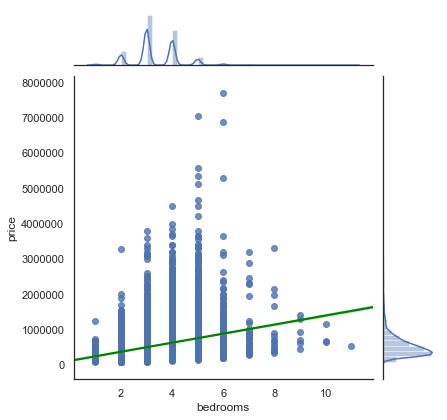

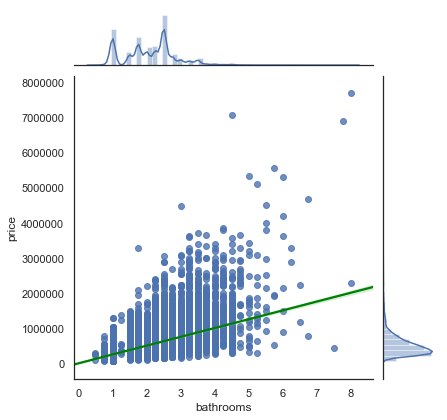

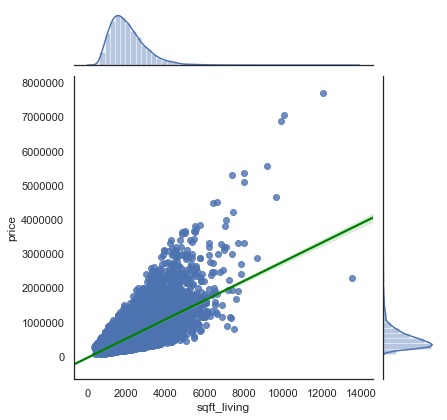

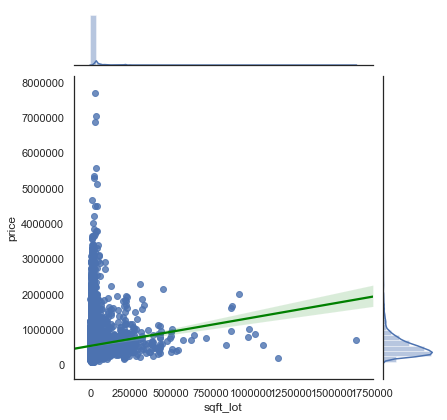

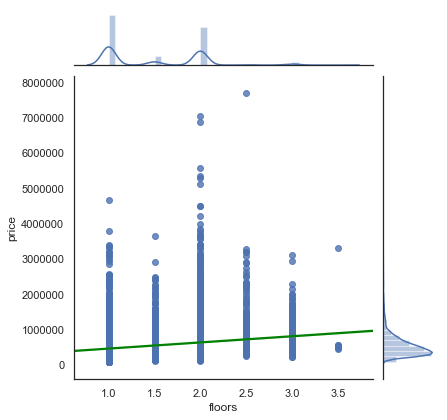

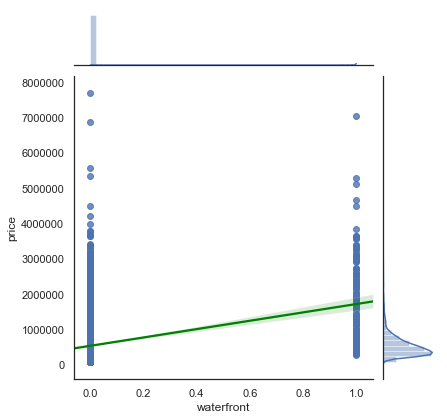

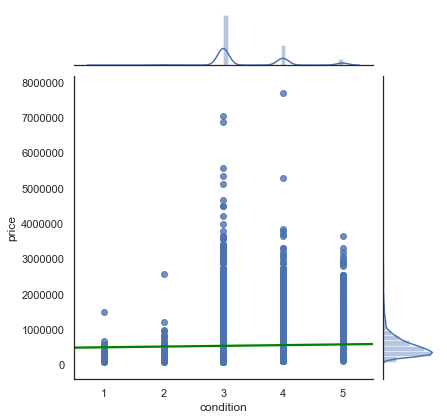

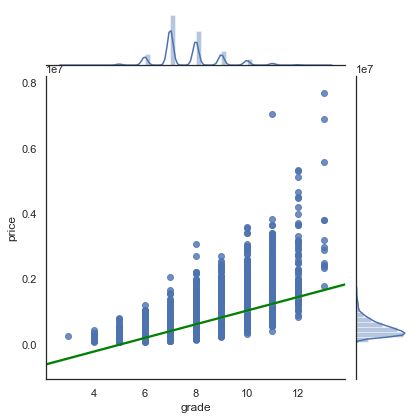

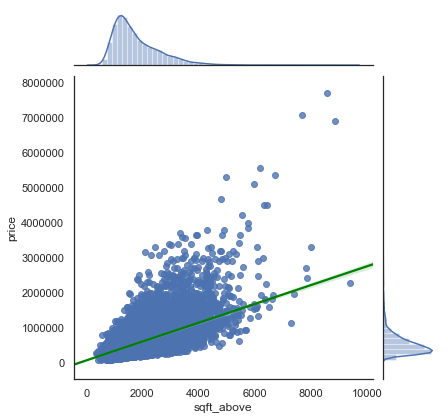

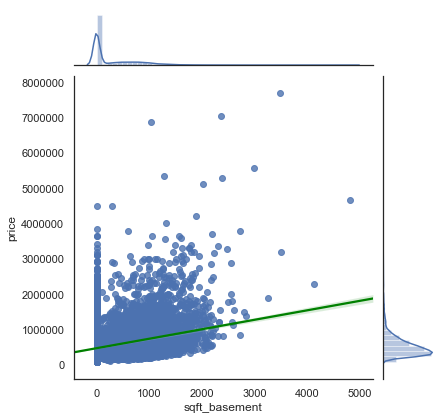

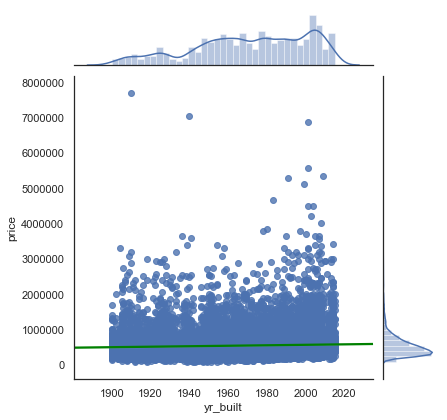

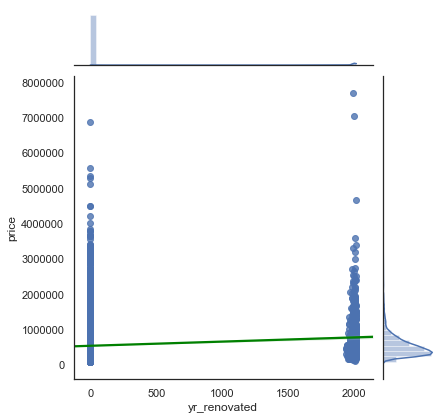

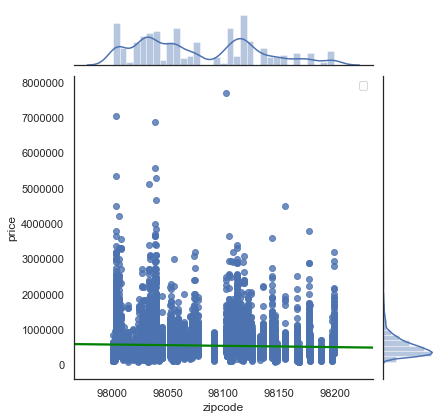

In [7]:
# print(df.info())
df = df[df.bedrooms < 33]
for c in df.drop(['price'],axis=1):
    sns.jointplot( x=c, y='price', data=df, kind='reg', joint_kws={'line_kws':{'color':'green'}})
plt.legend()
plt.show()

The 33 bedrooms is causing a problem so we'll eliminate that row. 

Several of these features provide no relationship with the price. These include year built and year renovated and waterfront.

That means we will go ahead with these fields: 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade'. The others don't seem to add anything to determining a value. 

First we'll follow up the above with a complete regression with the full set of features so that we can compare and verify our observations.

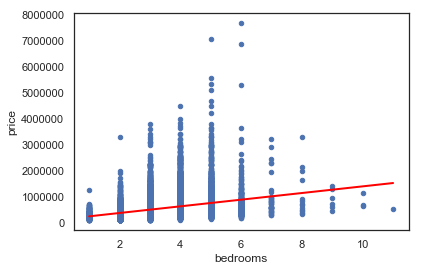

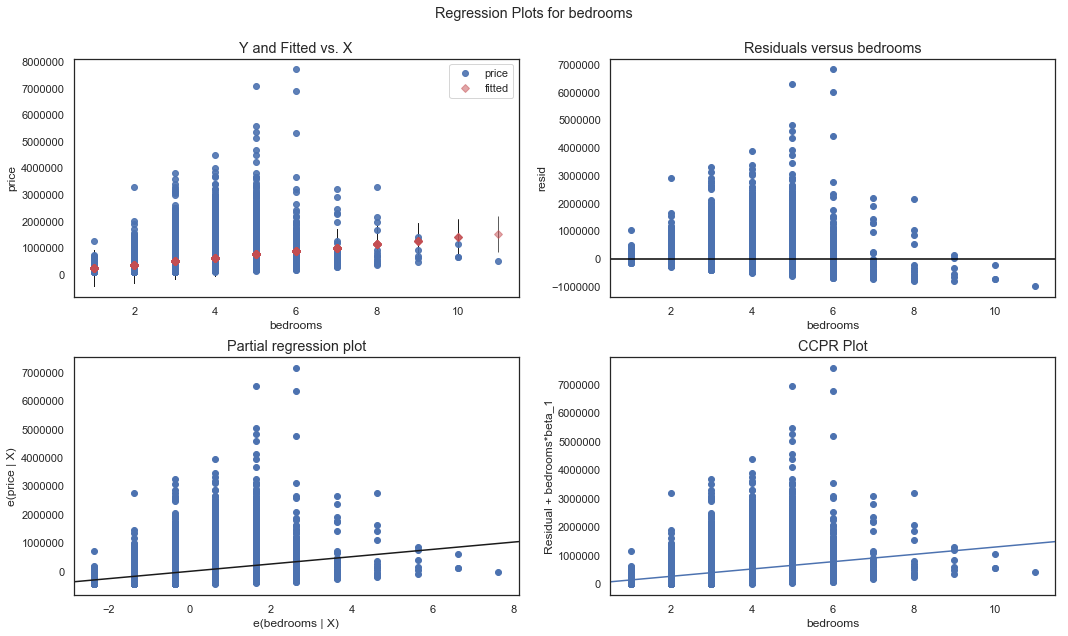

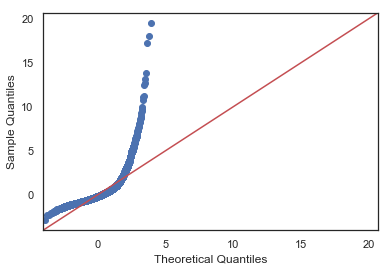

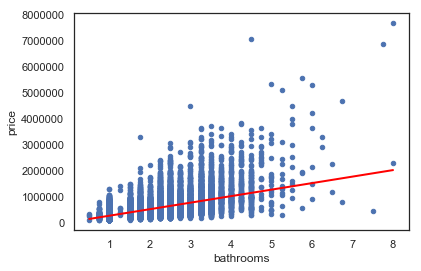

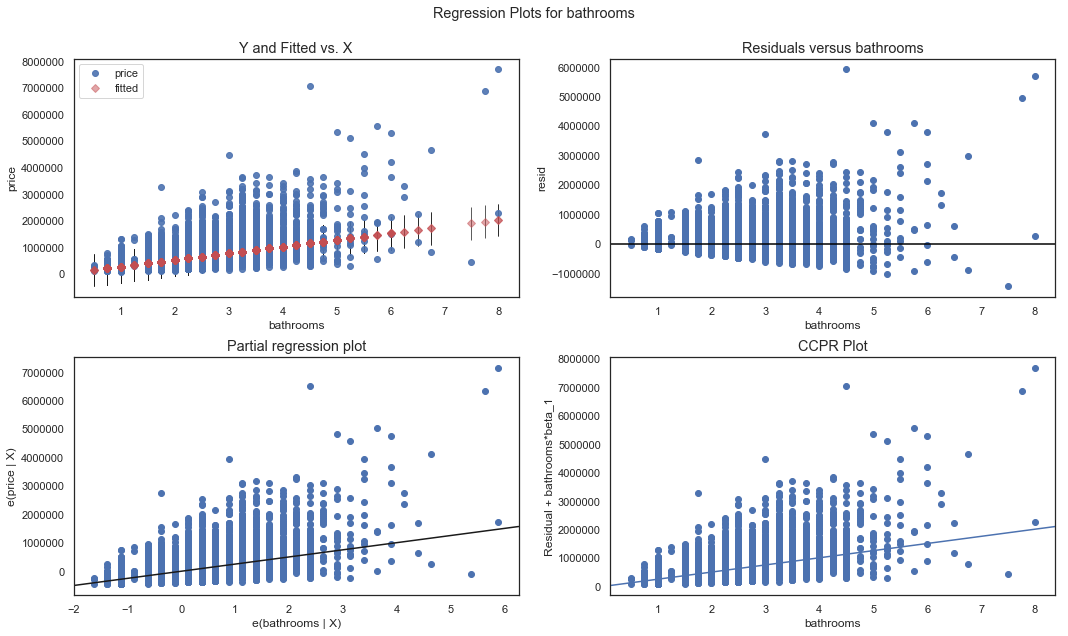

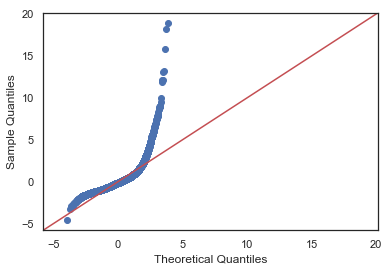

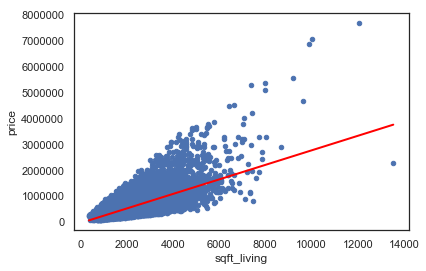

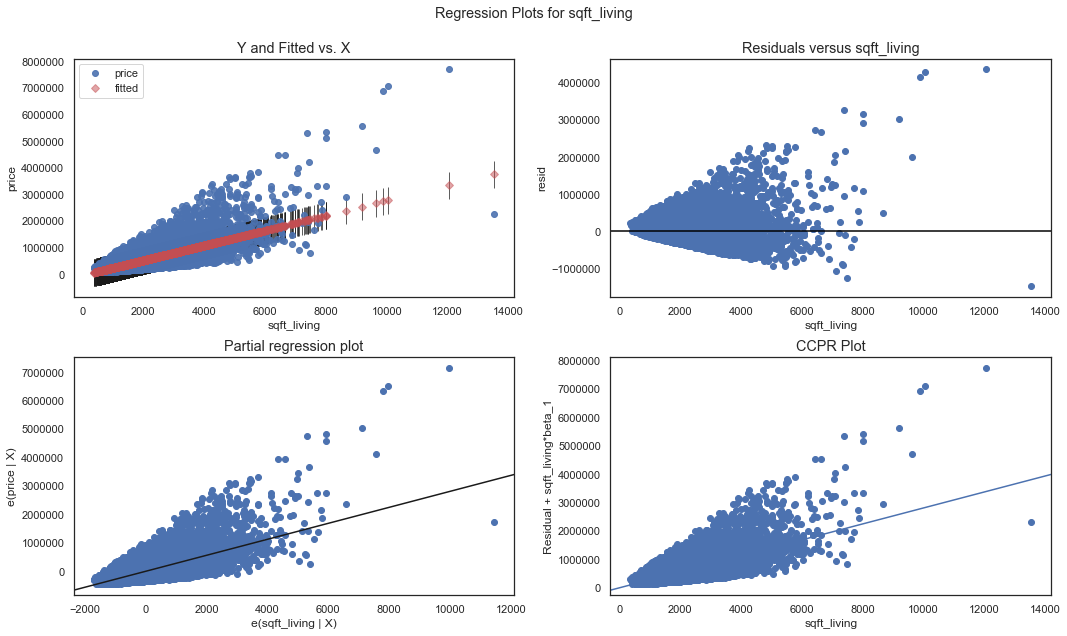

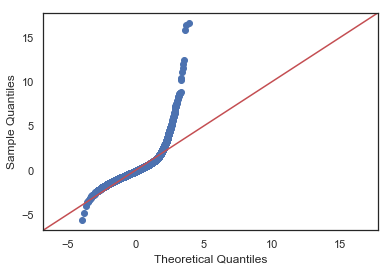

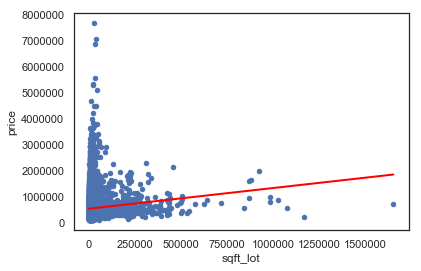

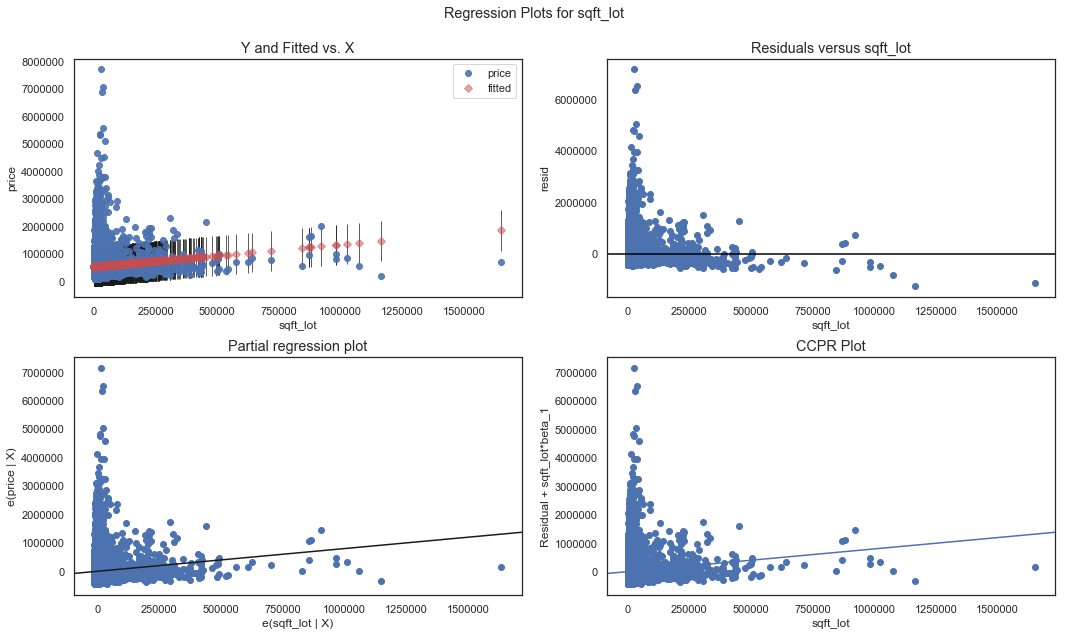

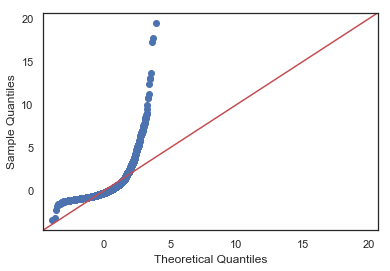

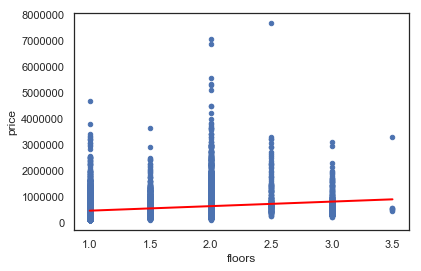

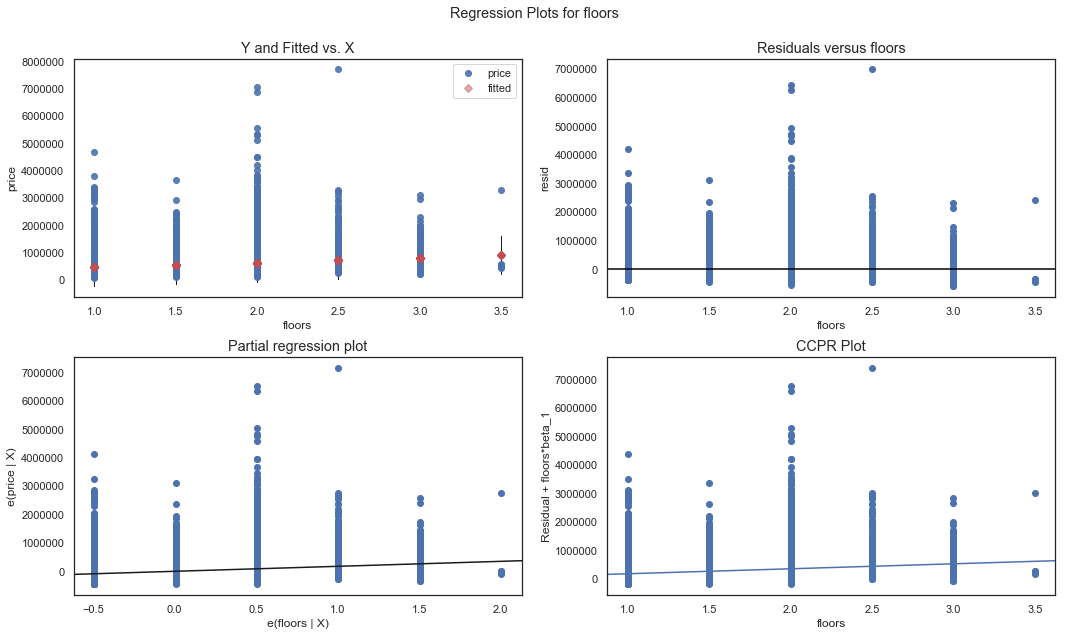

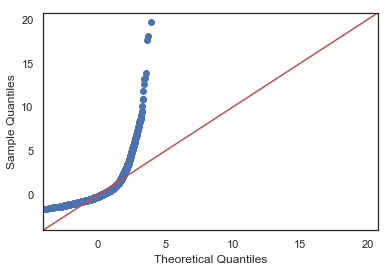

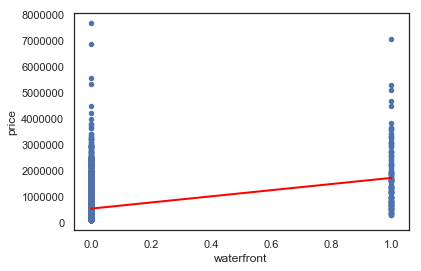

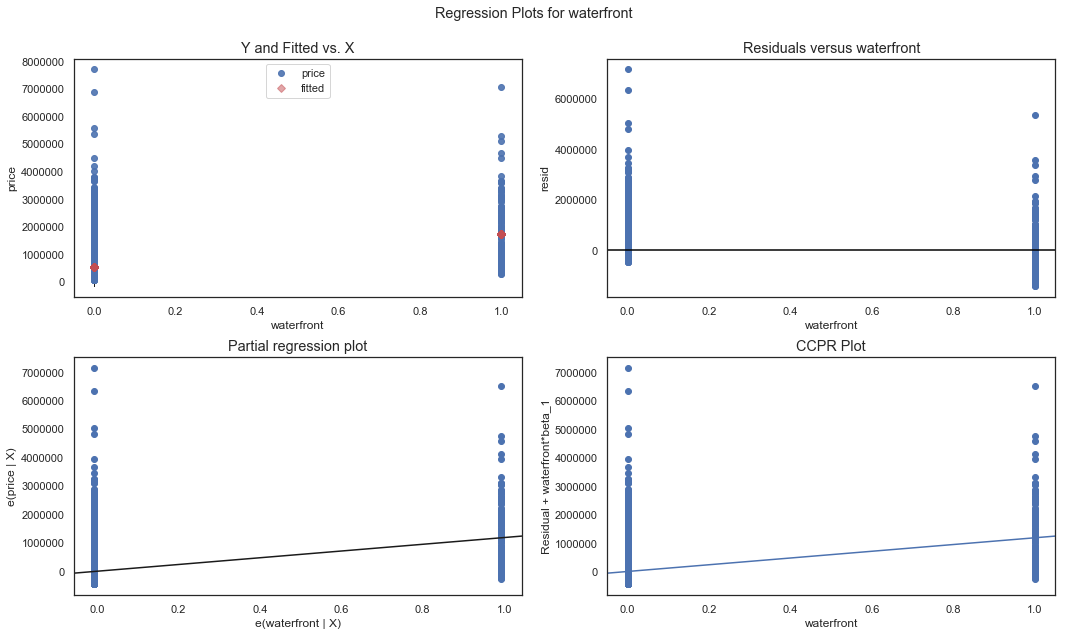

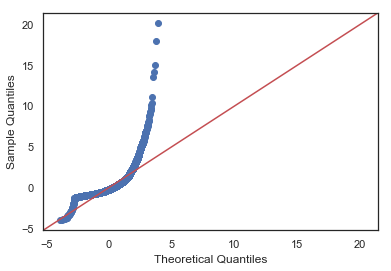

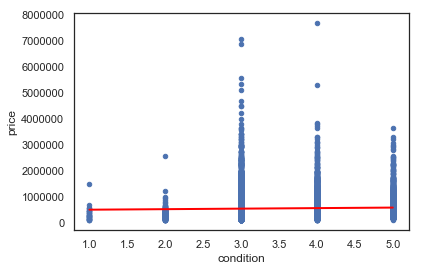

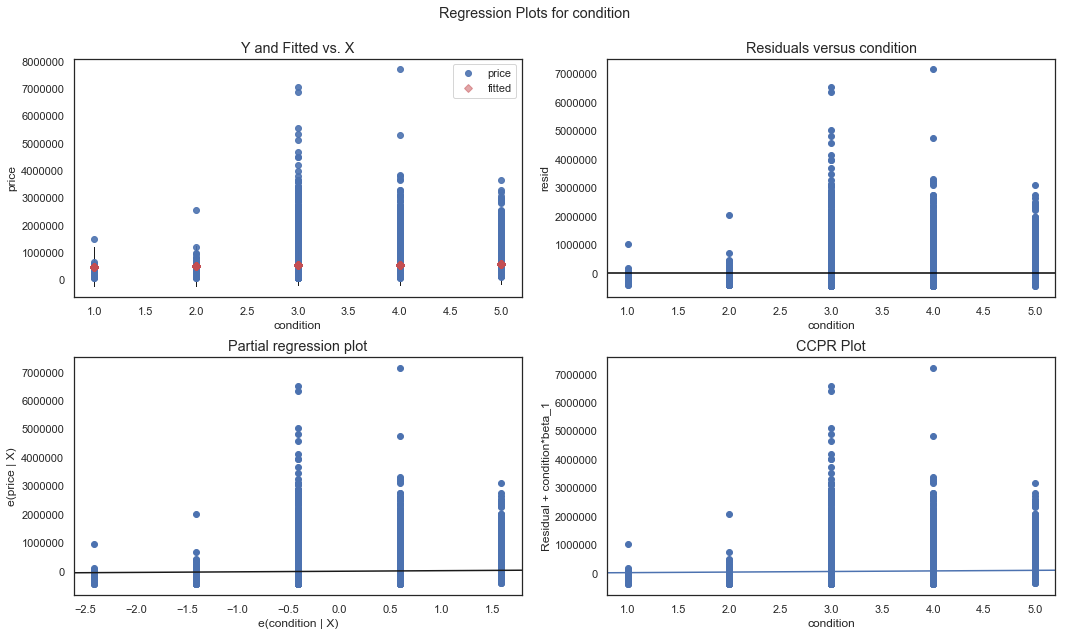

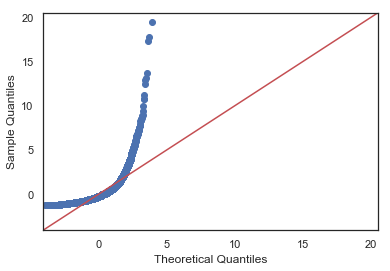

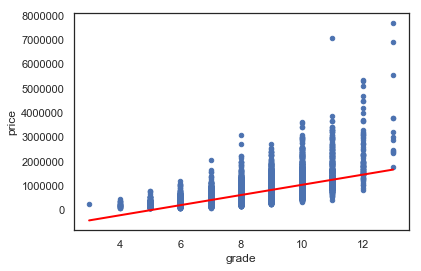

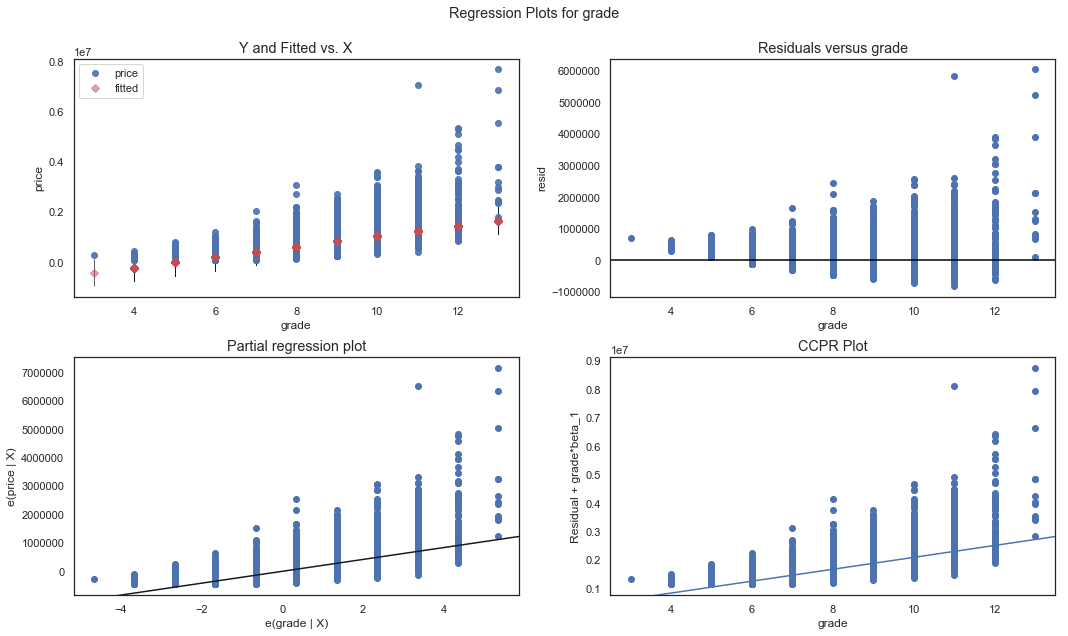

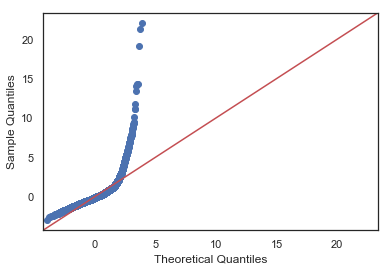

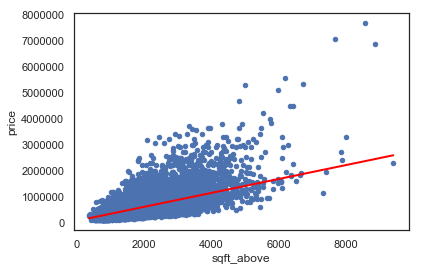

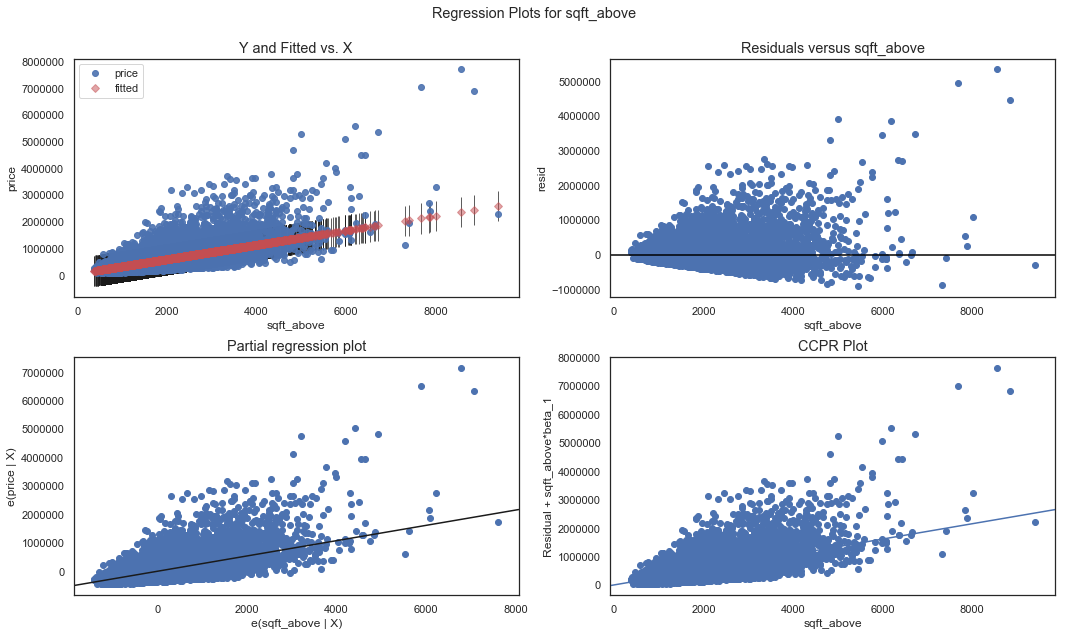

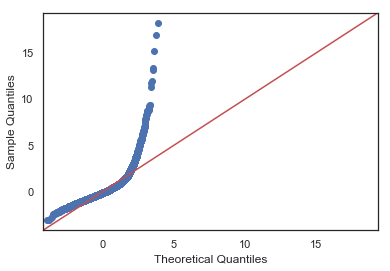

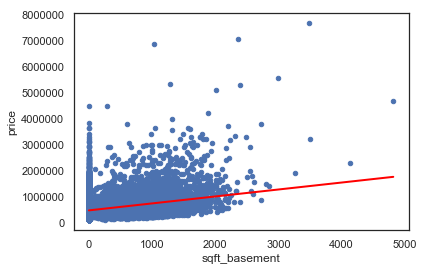

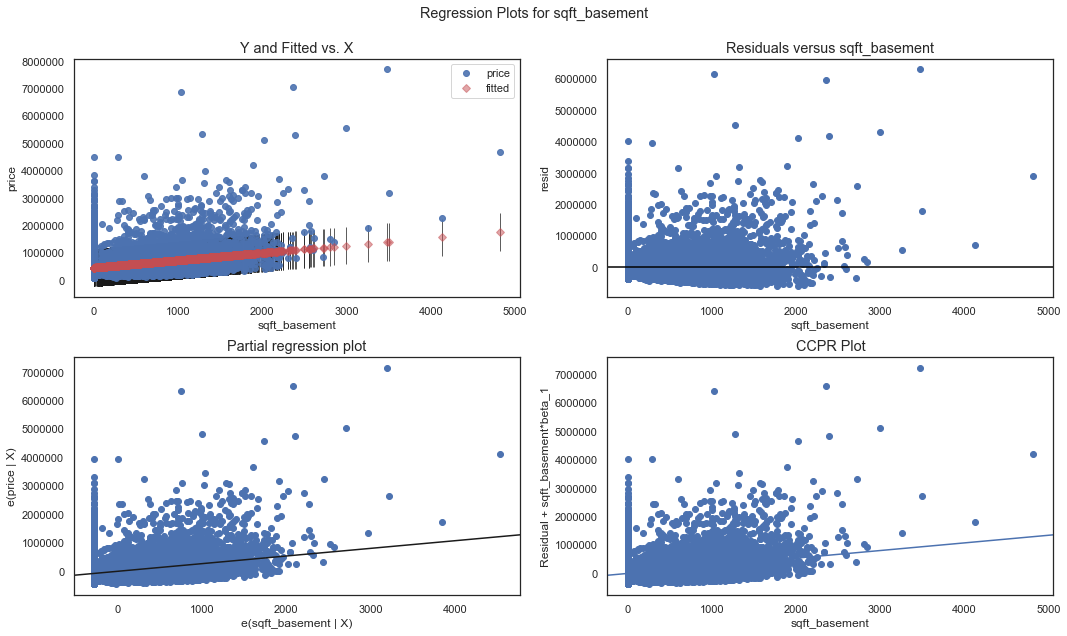

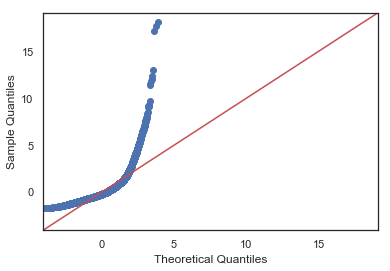

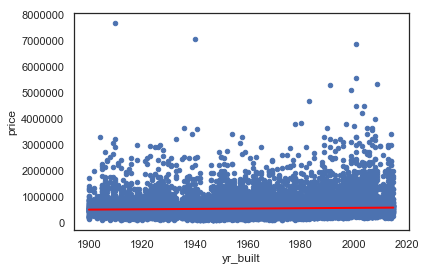

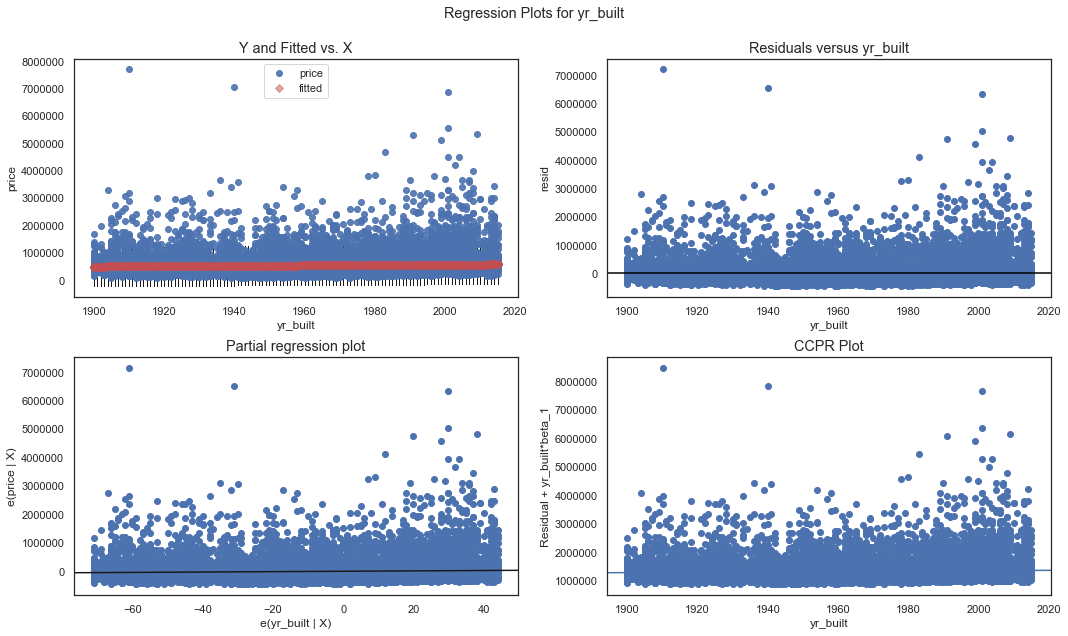

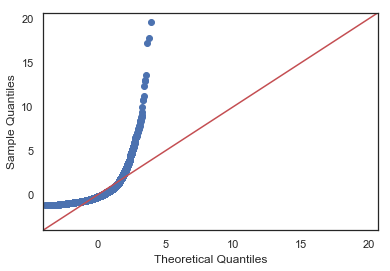

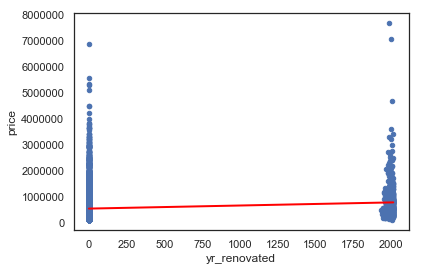

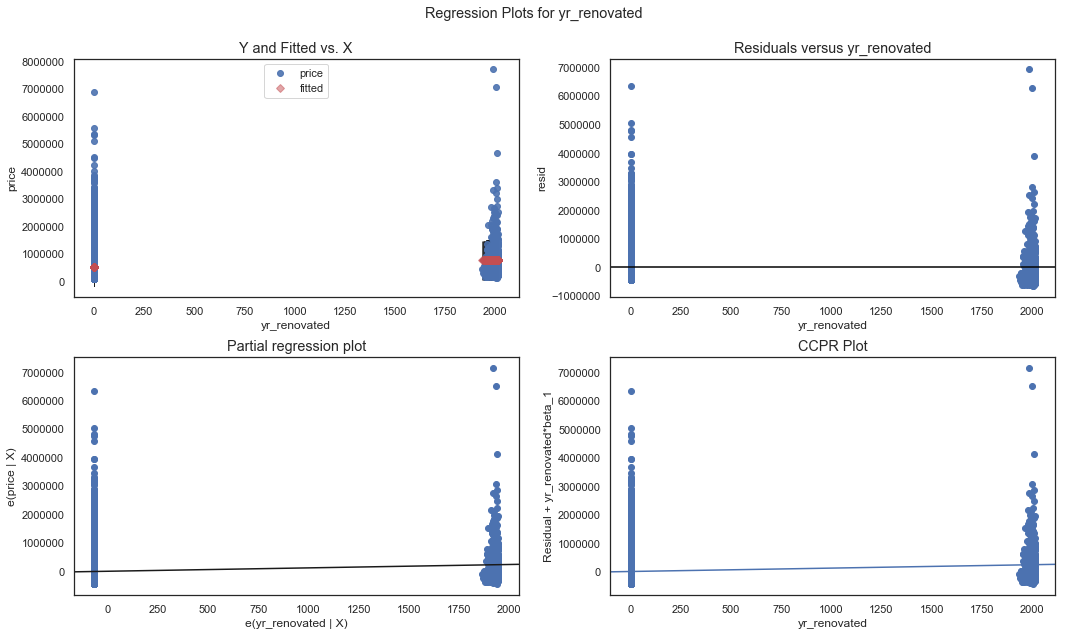

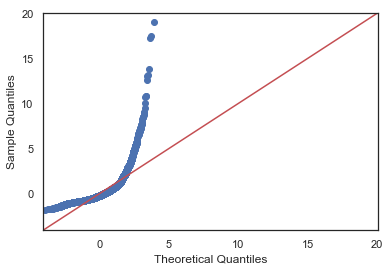

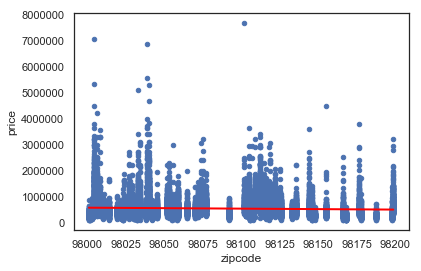

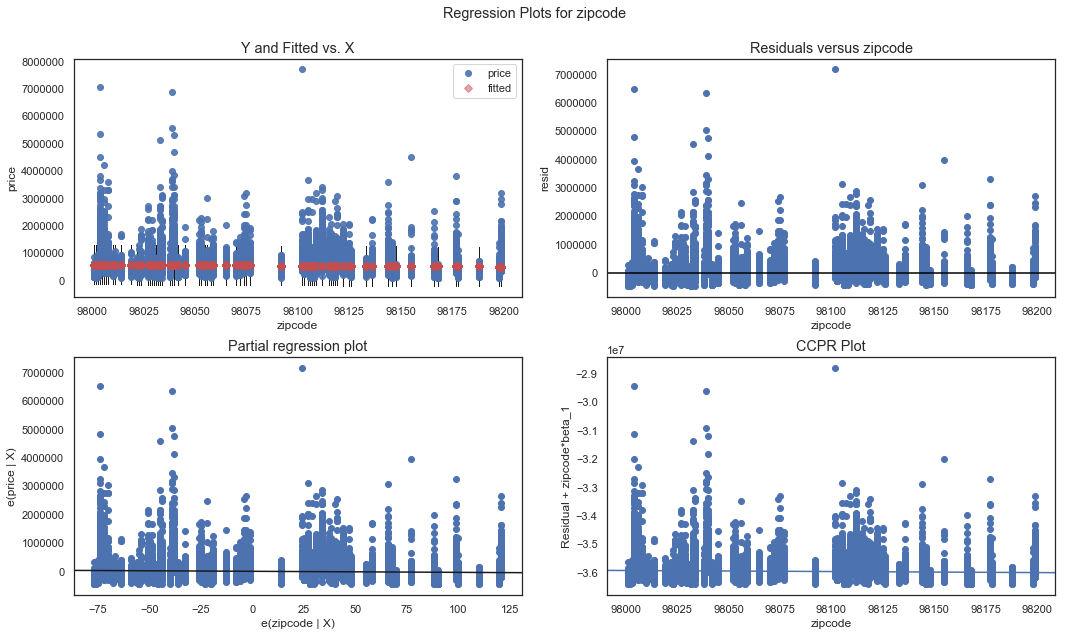

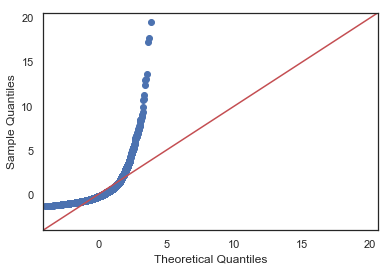

,0,1,2,3,4,5
0,feature,slope,y-int,p-value,r-squared,normality
1,bedrooms,128387,107394,0,0.0998311,1.16886e+06
2,bathrooms,251247,8692.16,0,0.276587,882666
3,sqft_living,280.869,-44011.5,0,0.492704,542642
4,sqft_lot,0.797311,528253,5.5613e-40,0.00807828,1.14758e+06
5,floors,174824,279085,0,0.0659568,1.25564e+06
6,waterfront,1.18493e+06,532281,0,0.0698586,909613
7,condition,20349.6,470905,1.18151e-07,0.00129821,1.13666e+06
8,grade,209163,-1.06147e+06,0,0.446176,2.04387e+06
9,sqft_above,268.684,59716,0,0.366499,728343


In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as stats

def complete_regression( df ):
    """
        Performs a complete OLS and plots it.
            df = pandas dataframe
        returns stats for each feature:
            slope
            y-int
            p-value
            r-squared
            normality
        """
    statistics = [['feature', 'slope', 'y-int', 'p-value', 'r-squared', 'normality']]
    for i, c in enumerate(df.drop(columns=['price']).columns):
        f = 'price~' + c
        m = smf.ols(formula=f, data=df).fit()
        X = pd.DataFrame({c: [df[c].min(), df[c].max()] })
        y = m.predict(X)
        statistics.append( [c, m.params[1], m.params[0], m.pvalues[1], 
                            m.rsquared, sms.jarque_bera(m.resid)[0]] )
        df.plot(kind='scatter', x=c, y='price')
        plt.plot(X,y,c='red',linewidth=2)
    
        fig = plt.figure(figsize=(15,9))
        fig = sm.graphics.plot_regress_exog(m,c,fig=fig)
    
        fig = sm.graphics.qqplot(m.resid, dist=stats.norm, line='45', fit=True)
        plt.show()
    return statistics
# end 

s = complete_regression(df)
pd.DataFrame(s)

Based on the above results, sqft_living, bathrooms, grade, and sqft_above are the most likely based on r-squared to be good inidcators of price. Note that the normality is very low for all of these, so we will try to normalize the log of the data and rerun for those four features. The others are really not worth persuing at this point.

      price  sqft_living  sqft_living15  bathrooms  grade  sqft_above
0  221900.0         1180           1340       1.00      7        1180
1  538000.0         2570           1690       2.25      7        2170
2  180000.0          770           2720       1.00      6         770
3  604000.0         1960           1360       3.00      7        1050
4  510000.0         1680           1800       2.00      8        1680


C:\Users\timla\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


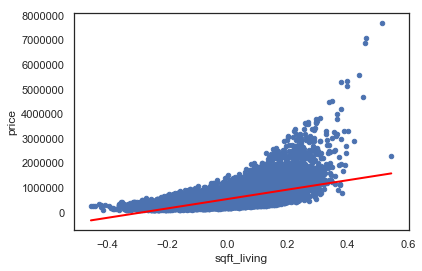

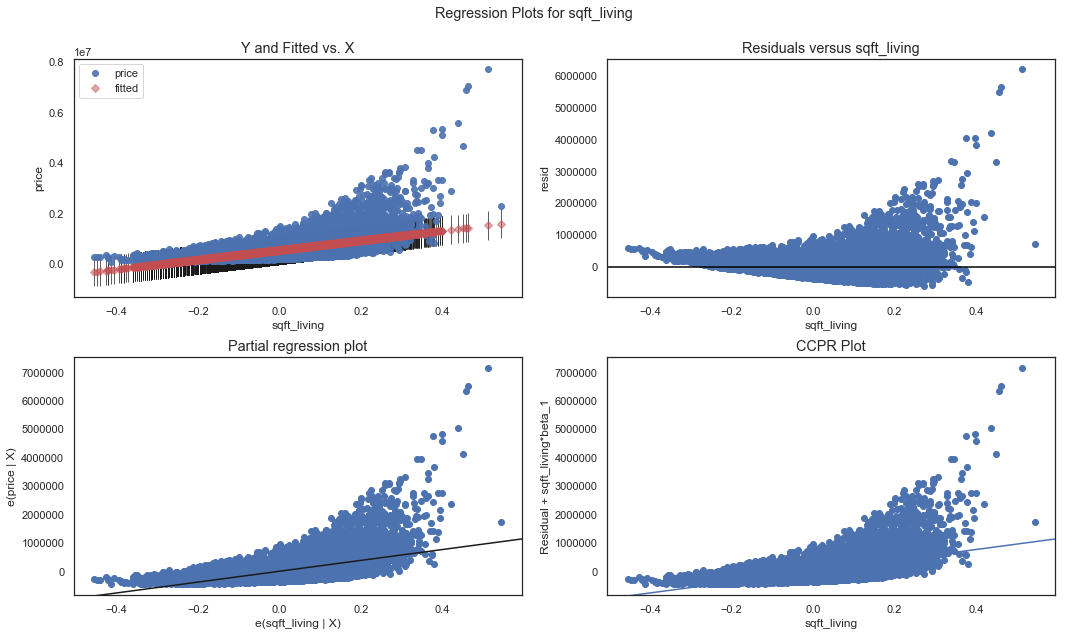

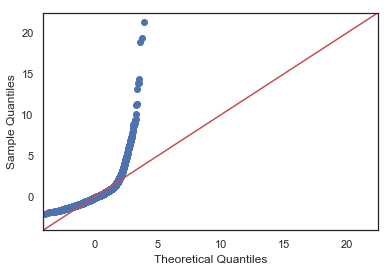

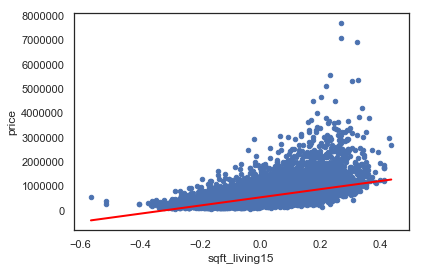

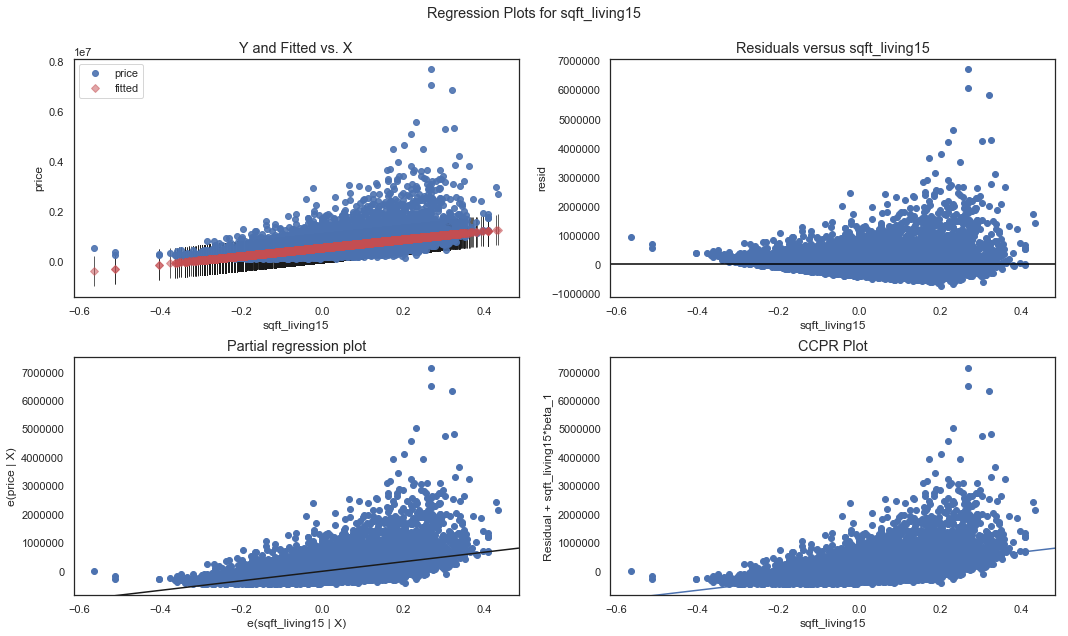

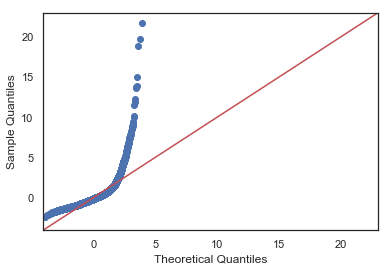

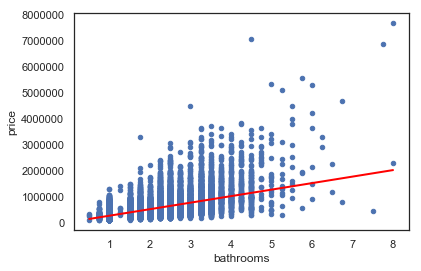

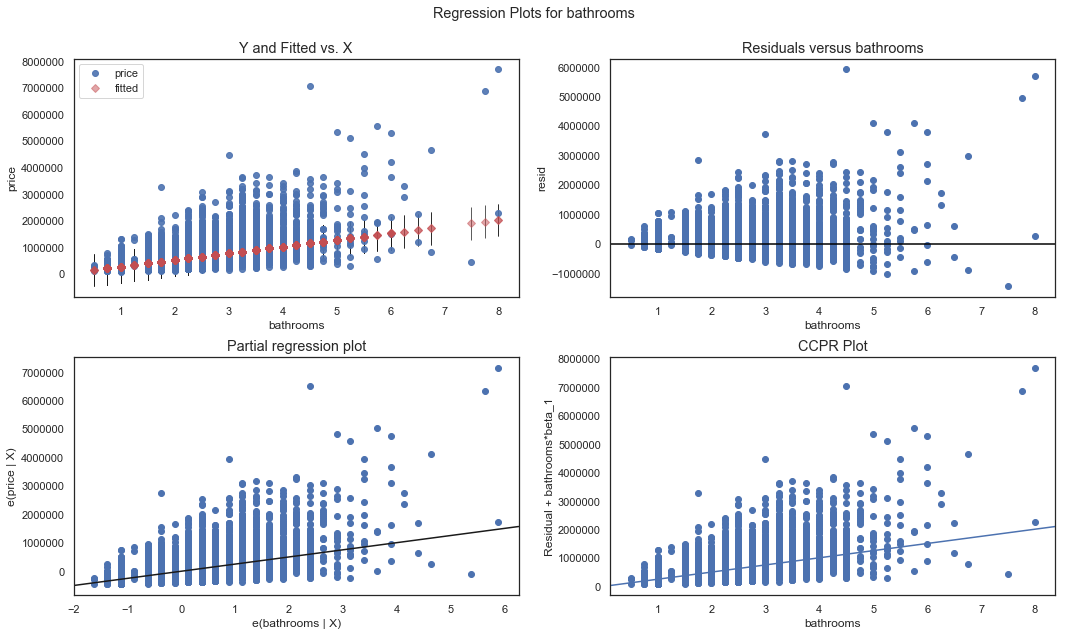

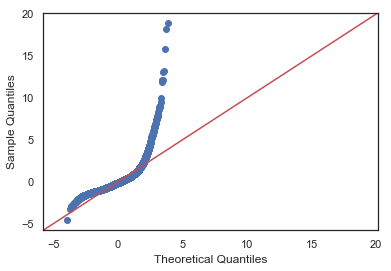

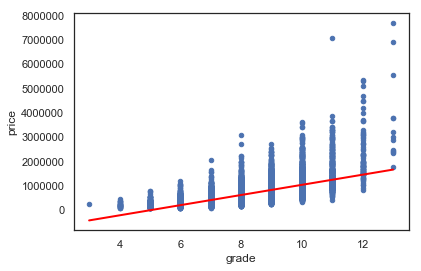

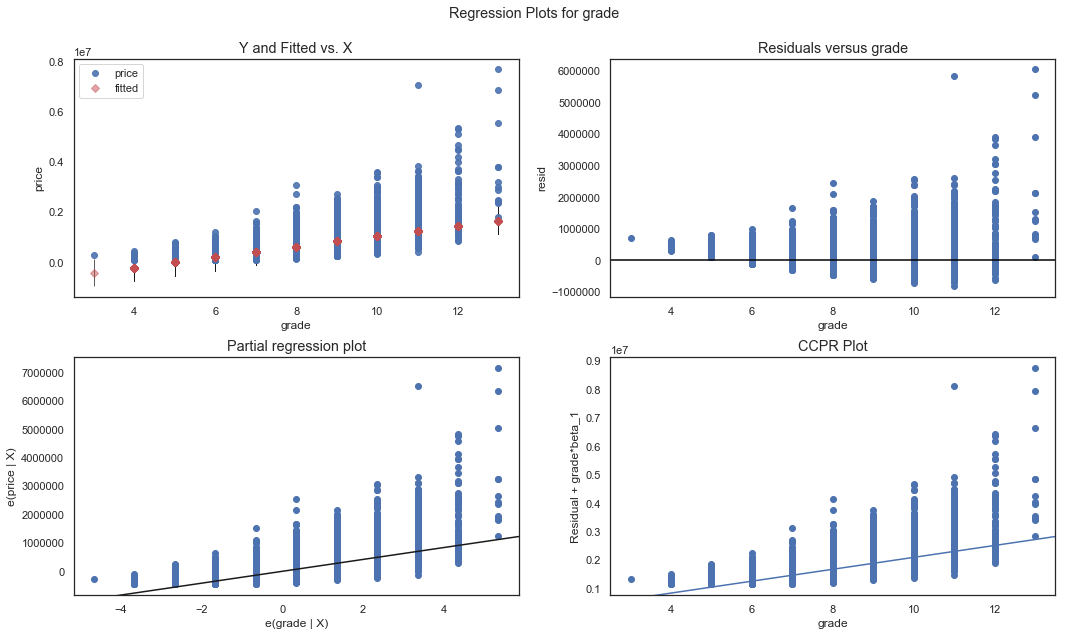

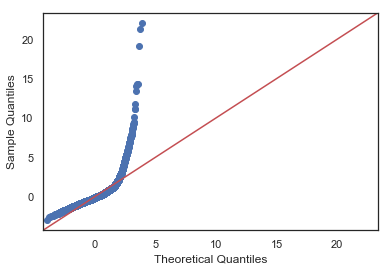

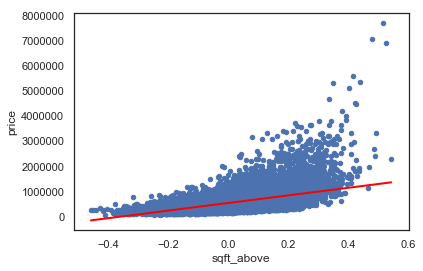

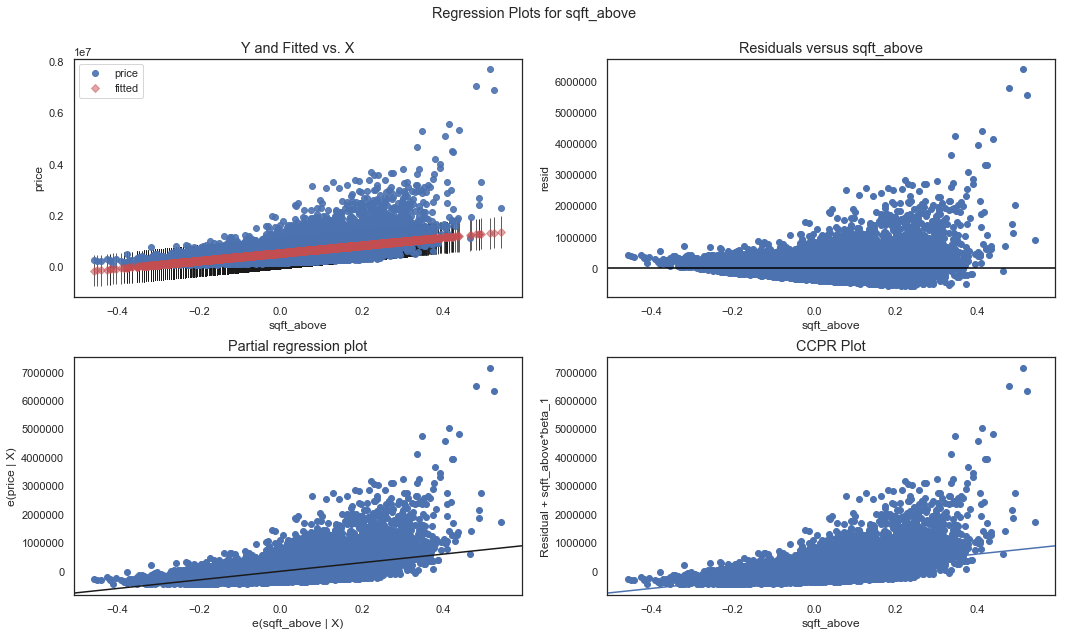

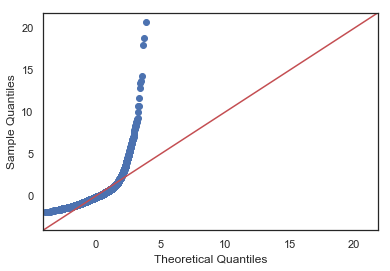

,0,1,2,3,4,5
0,feature,slope,y-int,p-value,r-squared,normality
1,sqft_living,1.90751e+06,540297,0,0.374346,1.65552e+06
2,sqft_living15,1.67468e+06,540297,0,0.295749,1.91477e+06
3,bathrooms,251242,8712.65,0,0.276577,882736
4,grade,209158,-1.06142e+06,0,0.446158,2.0439e+06
5,sqft_above,1.51037e+06,540297,0,0.294497,1.39207e+06


In [9]:
df_new = df_orig[['price','sqft_living','sqft_living15','bathrooms','grade','sqft_above']]
print(df_new.head())

# Now do logs
df_new.sqft_living = np.log(df_new.sqft_living)
df_new.sqft_living15 = np.log(df_new.sqft_living15)
df_new.sqft_above = np.log(df_new.sqft_above)

# And Norm
df_new.sqft_living = (df_new.sqft_living - df_new.sqft_living.mean()) / (df_new.sqft_living.max() - df_new.sqft_living.min())
df_new.sqft_living15 = (df_new.sqft_living15 - df_new.sqft_living15.mean()) / (df_new.sqft_living15.max() - df_new.sqft_living15.min())
df_new.sqft_above = (df_new.sqft_above - df_new.sqft_above.mean()) / (df_new.sqft_above.max() - df_new.sqft_above.min())

# And replot the above
s = complete_regression(df_new)
pd.DataFrame(s)

Sqft_living15 seems to be an even better predictor than the sqft_living of the house itself. That kind of reinforces the old adage that "location, location, location" is the real estate mantra.

Grade still seems to be the best predictor and that makes sense because it is based on a human judgement with presumably some talent and using all the attributes including soft ones such as style, design, condition, floor plans, colors, etc. and bringing them together into a single feature.

Next step is to perform an initial multi-feature ordinary least squares and analyze the results.


In [10]:
# Step 10: Perform multi-featured OLS

from statsmodels.formula.api import ols

features = df_new.drop(columns='price')
formula = "price" + "~" + "+".join(features.columns)
model = ols( formula=formula, data=df_new ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     4047.
Date:                Mon, 21 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:54:21   Log-Likelihood:            -3.0025e+05
No. Observations:               21597   AIC:                         6.005e+05
Df Residuals:                   21591   BIC:                         6.006e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.558e+05   1.94e+04    -33.765      0.000   -6.94e+05   -6.18e+05
sqft_living     9.61e+05   3.62e+04     26.512      0.000     8.9e+05    1.03e+06
sqft_living15  2.315e+05    2.4e+04      9.650      0.000    1.84e+05    2.79e+05
bathrooms      1.996e+04   3721.696      5.364      0.000    1.27e+04    2.73e+04
grade          1.507e+05   2542.448     59.265      0.000    1.46e+05    1.56e+05
sqft_above    -4.567e+05   2.87e+04    -15.929      0.000   -5.13e+05   -4.01e+05
==============================================================================
Omnibus:                    20271.742   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2278180.016
Skew:                           4.188   Prob(JB):                         0.00
Kurtosis:                      52.614   Cond. No.                         187.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations:
1. Skew and Kurtosis are both high, which we had already observed.
2. Based on the p-value these all seem to have some predictive value.
3. Based on the r-squared value, these features explain about half of the price.

We already proposed that GRADE was probably the best predictor, so we will test that with two different methods: 
1. stepwise selection and
2. feature ranking with recursive feature elimination.

We can then compare the results and check them against our predictions.

In [11]:
# Step 12: Stepwise Selection

import statsmodels.api as sm

def stepwise_selection( X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True ):
    """
        performs stepwise selection with forward and backward steps.
        X = pandas dataframe of feature values
        y = target values
        initial_list = list of features to include from beginning
        threshold_in = lowest pval to include
        threshold_out = highest pval before removing
        verbose = print actions
    """
    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for c in excluded:
            mod = sm.OLS( y, sm.add_constant(pd.DataFrame(X[included+[c]]))).fit()
            new_pval[c] = mod.pvalues[c]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        mod = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = mod.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    # end while
    return included
# end

selected = stepwise_selection( X=features, y=df_new.price )
print(selected)

Add  sqft_living15                  with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  sqft_living                    with p-value 0.0
Drop sqft_above                     with p-value 0.919488
Add  grade                          with p-value 0.0


C:\Users\timla\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  sqft_above                     with p-value 7.61918e-55
Add  bathrooms                      with p-value 8.23871e-08
['sqft_living15', 'sqft_living', 'grade', 'sqft_above', 'bathrooms']


Observations on Stepwise Selection:
1. Again, these all gave very good p-values. After looking at these I am going to add bedrooms back in and see where it comes up because bathrooms gave a good result. 
2. I am going to drop _above and _living15 because they are not as good as _living.

In [12]:
df_new = df_orig[['price','sqft_living','grade','bedrooms','bathrooms']]
print(df_new.head())

features = df_new.drop(columns='price')
selected = stepwise_selection( X=features, y=df_new.price )
print(selected)

      price  sqft_living  grade  bedrooms  bathrooms
0  221900.0         1180      7         3       1.00
1  538000.0         2570      7         3       2.25
2  180000.0          770      6         2       1.00
3  604000.0         1960      7         4       3.00
4  510000.0         1680      8         3       2.00
Add  bathrooms                      with p-value 0.0
Add  sqft_living                    with p-value 0.0
Drop bathrooms                      with p-value 0.149588
Add  grade                          with p-value 0.0
Add  bedrooms                       with p-value 1.68881e-79
Add  bathrooms                      with p-value 6.76888e-15
['sqft_living', 'grade', 'bedrooms', 'bathrooms']


C:\Users\timla\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Let's compare with Scikit-Learn's feature ranking.

In [13]:
# Step 14: Feature ranking with recursive feature elminination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE( linreg, n_features_to_select=2 )
selector = selector.fit( features, df_new.price )

print(features.columns)
selector.support_

Index(['sqft_living', 'grade', 'bedrooms', 'bathrooms'], dtype='object')


array([False,  True, False,  True])

With n_features_to_select set to one, it chose GRADE. With two it added BATHROOMS. 

Now run the larger dataset now with just the really obvious things removed such as lat, long, zip, etc. to see if we overlooked any other relevant features.

In [14]:
linreg = LinearRegression()
selector = RFE( linreg, n_features_to_select=2 )

# Using DF from before creating DF_NEW
features = df.drop(columns='price')

selector = selector.fit( features, df.price )

print(features.columns)
print(selector.support_)
print(selector.ranking_)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')
[False False False False False  True False  True False False False False
 False]
[ 6  3  7 12  4  1  2  1  9  8  5 11 10]


Interesting. It chose WATERFRONT and GRADE this time. That's not completely counter-intuitive. This shows CONDITION as the second ranking, and BATHROOMS again ranked near the top.

Another observation is that this data has not been normalized and the result seems mostly consistent with the normalized data.

Next we will drop the zip, waterfront, floors, and yr columns and normalize the remaining columns and rerun the above tests starting at "Step 10: Perform multi-featured OLS." From that we can decide what dataset to continue on to the remaining tests.


Perform a train-test split and see how well we can predict results. 

Finally, we'll do some other rankings to see trends and whatever other interesting facts from our data.


In [15]:
# Step 20: Drop and normalize and rerun from Step 10

# df is the original minus the lat, long, etc. fields and our starting point.
df_20 = df.drop(columns=['floors', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode'])
# Normalize everything except price - no log scaling.
def normalize(x):
    """
        return mean-normalized x
    """
    return (x - x.mean()) / (x.max() - x.min())
# end
df_20.sqft_living = normalize(df_20.sqft_living)
df_20.sqft_lot = normalize(df_20.sqft_lot)
df_20.sqft_above = normalize(df_20.sqft_above)
df_20.sqft_basement = normalize(df_20.sqft_basement)
df_20.bedrooms = normalize(df_20.bedrooms)
df_20.bathrooms = normalize(df_20.bathrooms)
df_20.grade = normalize(df_20.grade)
df_20.condition = normalize(df_20.condition)
print(df_20.sqft_living.mean())
print(df_20.head())
print(df_20.describe())

# Step 20A: Rerun starting with Step 10

features = df_20.drop(columns='price')
formula = "price" + "~" + "+".join(features.columns)
model = ols( formula=formula, data=df_20 ).fit()
model.summary()

1.6842786555048013e-17
      price  bedrooms  bathrooms  sqft_living  sqft_lot  condition     grade  \
0  221900.0 -0.037183  -0.148779    -0.068363 -0.005724  -0.102438 -0.065795   
1  538000.0 -0.037183   0.017888     0.037180 -0.004760  -0.102438 -0.065795   
2  180000.0 -0.137183  -0.148779    -0.099495 -0.003089  -0.102438 -0.165795   
3  604000.0  0.062817   0.117888    -0.009138 -0.006118   0.397562 -0.065795   
4  510000.0 -0.037183  -0.015446    -0.030398 -0.004252  -0.102438  0.034205   

   sqft_above  sqft_basement  
0   -0.067326      -0.059274  
1    0.042187       0.023713  
2   -0.112680      -0.059274  
3   -0.081707       0.129522  
4   -0.012017      -0.059274  
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159600e+04  2.159600e+04  2.159600e+04  2.159600e+04  2.159600e+04   
mean   5.402920e+05  8.520998e-18 -1.415835e-16  1.684279e-17 -1.795771e-18   
std    3.673760e+05  9.041137e-02  1.025331e-01  6.971314e-02  2.508636e-

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     3466.
Date:                Mon, 21 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:54:24   Log-Likelihood:            -2.9846e+05
No. Observations:               21596   AIC:                         5.969e+05
Df Residuals:                   21587   BIC:                         5.970e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.403e+05   1654.246    326.609      0.000    5.37e+05    5.44e+05
bedrooms      -4.956e+05   2.36e+04    -20.976      0.000   -5.42e+05   -4.49e+05
bathrooms     -1.328e+05   2.59e+04     -5.137      0.000   -1.84e+05   -8.22e+04
sqft_living    2.702e+06   2.86e+05      9.461      0.000    2.14e+06    3.26e+06
sqft_lot       -4.77e+05   6.76e+04     -7.061      0.000   -6.09e+05   -3.45e+05
condition      2.348e+05   1.06e+04     22.204      0.000    2.14e+05    2.56e+05
grade          1.101e+06   2.37e+04     46.453      0.000    1.05e+06    1.15e+06
sqft_above     8296.6822   1.95e+05      0.042      0.966   -3.75e+05    3.91e+05
sqft_basement  2.957e+05   1.04e+05      2.837      0.005    9.14e+04       5e+05
==============================================================================
Omnibus:                    16646.452   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           969580.347
Skew:                           3.211   Prob(JB):                         0.00
Kurtosis:                      35.191   Cond. No.                         217.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is getting better. R-squared is higher by about 10%. Skew and Kurtosis are much lower. sqft_above exceeds the 0.05 p-value but all others are close to or zero.

Next we'll do feature selection two ways.


In [16]:
# Step 22 - Feature selection.

print("Feature selection (from 12):\n")

selected = stepwise_selection( X=features, y=df_20.price )
print(selected)


print("\n\nFeature ranking with recursive feature elminination (from 14):\n")

linreg = LinearRegression()
selector = RFE( linreg, n_features_to_select=2 )
selector = selector.fit( features, df_20.price )

print(features.columns)
print(selector.support_)
print(selector.ranking_)

Feature selection (from 12):

Add  sqft_above                     with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Add  condition                      with p-value 2.57373e-101
Add  bedrooms                       with p-value 1.22374e-104
Add  sqft_lot                       with p-value 8.49996e-12
Add  bathrooms                      with p-value 2.53963e-07
Add  sqft_basement                  with p-value 0.00455771
Drop sqft_above                     with p-value 0.966144
['sqft_living', 'grade', 'condition', 'bedrooms', 'sqft_lot', 'bathrooms', 'sqft_basement']


Feature ranking with recursive feature elminination (from 14):

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition',
       'grade', 'sqft_above', 'sqft_basement'],
      dtype='object')
[False False  True False False  True False False]
[3 6 1 2 5 1 7 4]


C:\Users\timla\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Well this is entirely consistent with our results from previous tests with the other dataset. (Same data, just different treatment.) We have sqft_living and grade again leading the results. Note on the FEATURE SELECTION test it rejected sqft_above just as we would have predicted from our OLS results above.

And the worst ranking on the RFE was also sqft_above. This time bedrooms was ranked higher than bathrooms however. And the lot square foot had the second highest ranking, whereas it was ranked near last in the previous tests.

Now we'll continue with the train test splits and continue using this set of data.

In [17]:
# Step 30: Test-train splits using df_20 dataframe.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( features, df_20.price, test_size=0.2 )
print( len(X_train), len(X_test), len(y_train), len(y_test) )
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

from sklearn.metrics import mean_squared_error

print( "Train MSE: ", mean_squared_error(y_train, y_hat_train) )
print( "Test MSE:  ", mean_squared_error(y_test, y_hat_test) )

pct_diff = abs( (mse_train - mse_test) / mse_train )
print( "Pct Diff:  ", pct_diff )

17276 4320 17276 4320
Train Mean Squarred Error: 59922978655.69318
Test Mean Squarred Error: 55717202766.23915
Train MSE:  59922978655.69318
Test MSE:   55717202766.23915
Pct Diff:   0.07018636229049408


This seems like a very odd number -- the size of them -- however they are very close together - only a 4.7% difference between the two errors. So based on this the model is doing a good job of predicting home sales prices.

Next we'll use Scikit Learn's cross_val_score to obtain the errors.


In [18]:
# Step 32: Cross Validation 

from sklearn.model_selection import cross_val_score

linreg = LinearRegression()
cv_5 = cross_val_score( linreg, features, df_20.price, cv=5 )
print(cv_5)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_5.mean(), cv_5.std() * 2))


[0.54544402 0.5577057  0.54565884 0.57080104 0.58187994]
Accuracy: 0.56 (+/- 0.03)


Well this agrees nicely with our results from above. Our model predicts about 56% of the price of the house. 

Now we'll run the above with one feature at a time to see what kind of differences we get. That way we can be sure that
some are not dragging the model down.


In [19]:
# Step 34: Make above a function and call for each feature:

def cvs( feature, target, cv ):
    """
        Perform cross value score
            feature = list of features to use
            target = target values
            cv = number of buckets
        returns the cv scores
    """
    linreg = LinearRegression()
    cv_5 = cross_val_score( linreg, feature, target, cv=cv )
    return cv_5
    # print(feature)
    # print(cv_5)
    # print("Accuracy: %0.2f (+/- %0.2f)" % (cv_5.mean(), cv_5.std() * 2))

i = 1
for col in features:
    cv = cvs( np.array(features[col]).reshape(-1,1), df_20.price, 5 )
    print( i, col, ":  %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2))
    i += 1

print(selector.support_)
print(selector.ranking_)

1 bedrooms :  0.10 (+/- 0.01)
2 bathrooms :  0.27 (+/- 0.01)
3 sqft_living :  0.49 (+/- 0.01)
4 sqft_lot :  0.01 (+/- 0.01)
5 condition :  -0.00 (+/- 0.01)
6 grade :  0.45 (+/- 0.04)
7 sqft_above :  0.36 (+/- 0.01)
8 sqft_basement :  0.10 (+/- 0.01)
[False False  True False False  True False False]
[3 6 1 2 5 1 7 4]


This seems consistent with some things and not with others. We have reprinted the feature selection from Step 22 here for comparison.
1. Here the two most significant are grade and living, which was indicated before and was pretty consistent throughout.
2. But lot is very low score here, but was graded number 2 in feature selection (Step 22.)

Let's run grade and living together.

In [20]:
cv = cvs( features[['grade','sqft_living']], df_20.price, 5 )
print( "Grade,Living:  %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2) )

cv = cvs( features[['grade','sqft_living','bathrooms']], df_20.price, 5 )
print( "Grade,Living,Bathrooms:  %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2) )

cv = cvs( features[['grade','sqft_living','sqft_lot']], df_20.price, 5 )
print( "Grade,Living,Lot:  %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2) )


Grade,Living:  0.53 (+/- 0.02)
Grade,Living,Bathrooms:  0.54 (+/- 0.02)
Grade,Living,Lot:  0.53 (+/- 0.02)


So from this, it looks like each of the features improves the model, however almost all of the value is in grade and living. So, the only problem with this is that grade is a human-generated value. Using purely objective measures would mean that we should see how well we can predict without Grade and Condition. We'll return the above without those two and compare our results.

In [21]:
# Step 40: Repeat without grade and condition. NOTE DF_20 REPLACED BY DF_40.

df_40 = df_20.drop(columns=['grade','condition'])
print(df_40.head())

# Repeat from step 20A:
features = df_40.drop(columns='price')
formula = "price" + "~" + "+".join(features.columns)
model = ols( formula=formula, data=df_40 ).fit()
print(model.summary())

# FROM Step 22:
print("Feature selection (from 12):\n")

selected = stepwise_selection( X=features, y=df_40.price )
print(selected)


print("\n\nFeature ranking with recursive feature elminination (from 14):\n")

linreg = LinearRegression()
selector = RFE( linreg, n_features_to_select=2 )
selector = selector.fit( features, df_40.price )

print(features.columns)
print(selector.support_)
print(selector.ranking_)

# FROM Step 30: Test-train splits using df_40 dataframe.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( features, df_40.price, test_size=0.2 )
print( len(X_train), len(X_test), len(y_train), len(y_test) )
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

from sklearn.metrics import mean_squared_error

print( "Train MSE: ", mean_squared_error(y_train, y_hat_train) )
print( "Test MSE:  ", mean_squared_error(y_test, y_hat_test) )

pct_diff = abs( (mse_train - mse_test) / mse_train )
print( "Pct Diff:  ", pct_diff )

# FROM Step 32: Cross Validation 

from sklearn.model_selection import cross_val_score

linreg = LinearRegression()
cv_5 = cross_val_score( linreg, features, df_40.price, cv=5 )
print(cv_5)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_5.mean(), cv_5.std() * 2))


# FROM Step 34: Use above function and call for each feature:

i = 1
for col in features:
    cv = cvs( np.array(features[col]).reshape(-1,1), df_40.price, 5 )
    print( i, col, ":  %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2))
    i += 1

print(selector.support_)
print(selector.ranking_)

cv = cvs( features[['sqft_living']], df_40.price, 5 )
print( "Living:  %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2) )

cv = cvs( features[['sqft_living','bathrooms']], df_40.price, 5 )
print( "Living,Bathrooms:  %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2) )

cv = cvs( features[['sqft_living','sqft_lot']], df_40.price, 5 )
print( "Living,Bathrooms,Lot:  %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2) )


      price  bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  \
0  221900.0 -0.037183  -0.148779    -0.068363 -0.005724   -0.067326   
1  538000.0 -0.037183   0.017888     0.037180 -0.004760    0.042187   
2  180000.0 -0.137183  -0.148779    -0.099495 -0.003089   -0.112680   
3  604000.0  0.062817   0.117888    -0.009138 -0.006118   -0.081707   
4  510000.0 -0.037183  -0.015446    -0.030398 -0.004252   -0.012017   

   sqft_basement  
0      -0.059274  
1       0.023713  
2      -0.059274  
3       0.129522  
4      -0.059274  
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     3762.
Date:                Mon, 21 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:54:26   Log-Likelihood:         

C:\Users\timla\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


['sqft_above', 'sqft_living', 'bedrooms', 'sqft_lot']


Feature ranking with recursive feature elminination (from 14):

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement'],
      dtype='object')
[ True False  True False False False]
[1 5 1 2 4 3]
17276 4320 17276 4320
Train Mean Squarred Error: 65319739754.27574
Test Mean Squarred Error: 68724083373.44386
Train MSE:  65319739754.27574
Test MSE:   68724083373.44386
Pct Diff:   0.0521181442543221
[0.50978584 0.51226304 0.4946307  0.51014239 0.51548337]
Accuracy: 0.51 (+/- 0.01)
1 bedrooms :  0.10 (+/- 0.01)
2 bathrooms :  0.27 (+/- 0.01)
3 sqft_living :  0.49 (+/- 0.01)
4 sqft_lot :  0.01 (+/- 0.01)
5 sqft_above :  0.36 (+/- 0.01)
6 sqft_basement :  0.10 (+/- 0.01)
[ True False  True False False False]
[1 5 1 2 4 3]
Living:  0.49 (+/- 0.01)
Living,Bathrooms:  0.49 (+/- 0.01)
Living,Bathrooms,Lot:  0.49 (+/- 0.01)


Conclusion:

We still get a fairly good predictive value from sqft_living of about half of the value. None of the other features provide much help. sqft_above is mostly colinear with sqft_living so doesn't really mean much. Bedrooms and bathrooms are not much help and bathrooms seems to move around a lot.

The tran v. test pct difference is about two percentage points higher on these tests than prior.

Bottom line: Humans seem to make help when it comes to assigning value to homes.


Afterthought: Let's remove the outliers in bedrooms and say only include those with six or fewer bedrooms and see if that improves our results. After all, if we are trying to predict home values we are not going to expect many examples with more than six bedrooms.

In [25]:
# Step 50: Repeat without bedrooms > 6. NOTE df_40 REPLACED BY DF_50 after dropping rows.

# NOTE: df_50 and later are normalized so we have to go back to df 
# and redrop the columns and normalize after removing rows of 
# six or more bedrooms.

# df is the original minus the lat, long, etc. fields and our starting point.
df_50 = df.drop(columns=['grade','condition','floors', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode'])
df_50 = df_50[df_50.bedrooms < 6]

df_50.sqft_living = normalize(df_50.sqft_living)
df_50.sqft_lot = normalize(df_50.sqft_lot)
df_50.sqft_above = normalize(df_50.sqft_above)
df_50.sqft_basement = normalize(df_50.sqft_basement)
df_50.bedrooms = normalize(df_50.bedrooms)
df_50.bathrooms = normalize(df_50.bathrooms)
print(df_50.sqft_living.mean())
print(df_50.head())
print(df_50.describe())


print(df_50.describe())

# Repeat from step 20A:
features = df_50.drop(columns='price')
formula = "price" + "~" + "+".join(features.columns)
model = ols( formula=formula, data=df_50 ).fit()
print(model.summary())

# FROM Step 22:
print("Feature selection (from 12):\n")

selected = stepwise_selection( X=features, y=df_50.price )
print(selected)


print("\n\nFeature ranking with recursive feature elminination (from 14):\n")

linreg = LinearRegression()
selector = RFE( linreg, n_features_to_select=2 )
selector = selector.fit( features, df_50.price )

print(features.columns)
print(selector.support_)
print(selector.ranking_)

# FROM Step 30: Test-train splits using df_50 dataframe.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( features, df_50.price, test_size=0.2 )
print( len(X_train), len(X_test), len(y_train), len(y_test) )
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

from sklearn.metrics import mean_squared_error

print( "Train MSE: ", mean_squared_error(y_train, y_hat_train) )
print( "Test MSE:  ", mean_squared_error(y_test, y_hat_test) )

pct_diff = abs( (mse_train - mse_test) / mse_train )
print( "Pct Diff:  ", pct_diff )

# FROM Step 32: Cross Validation 

from sklearn.model_selection import cross_val_score

linreg = LinearRegression()
cv_5 = cross_val_score( linreg, features, df_50.price, cv=5 )
print(cv_5)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_5.mean(), cv_5.std() * 2))


# FROM Step 34: Use above function and call for each feature:

i = 1
for col in features:
    cv = cvs( np.array(features[col]).reshape(-1,1), df_50.price, 5 )
    print( i, col, ":  %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2))
    i += 1

print(selector.support_)
print(selector.ranking_)

cv = cvs( features[['sqft_living']], df_50.price, 5 )
print( "Living:  %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2) )

cv = cvs( features[['sqft_living','bathrooms']], df_50.price, 5 )
print( "Living,Bathrooms:  %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2) )

cv = cvs( features[['sqft_living','sqft_lot']], df_50.price, 5 )
print( "Living,Bathrooms,Lot:  %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2) )


-5.534667761382053e-18
      price  bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  \
0  221900.0 -0.081503  -0.175866    -0.090978 -0.005696   -0.077931   
1  538000.0 -0.081503   0.024134     0.052766 -0.004731    0.051481   
2  180000.0 -0.331503  -0.175866    -0.133377 -0.003061   -0.131526   
3  604000.0  0.168497   0.144134    -0.010316 -0.006089   -0.094924   
4  510000.0 -0.081503  -0.015866    -0.039271 -0.004224   -0.012572   

   sqft_basement  
0      -0.057652  
1       0.025335  
2      -0.057652  
3       0.131145  
4      -0.057652  
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.126300e+04  2.126300e+04  2.126300e+04  2.126300e+04  2.126300e+04   
mean   5.354206e+05 -9.110481e-16 -8.026313e-17 -5.534668e-18 -2.195348e-18   
std    3.547799e+05  2.069517e-01  1.199676e-01  9.236963e-02  2.511525e-02   
min    7.800000e+04 -5.815031e-01 -2.558661e-01 -1.747419e-01 -8.803270e-03   
25%    3.200000e+05 -8.150308e-02 -9.5866

C:\Users\timla\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  sqft_lot                       with p-value 4.07092e-15
Add  bathrooms                      with p-value 0.00489856
['sqft_above', 'sqft_living', 'bedrooms', 'sqft_lot', 'bathrooms']


Feature ranking with recursive feature elminination (from 14):

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement'],
      dtype='object')
[False False  True  True False False]
[2 5 1 1 4 3]
17010 4253 17010 4253
Train Mean Squarred Error: 62124964203.81789
Test Mean Squarred Error: 62770426237.22359
Train MSE:  62124964203.81789
Test MSE:   62770426237.22359
Pct Diff:   0.010389736906537064
[0.51025027 0.49159679 0.4865039  0.5068647  0.51462981]
Accuracy: 0.50 (+/- 0.02)
1 bedrooms :  0.09 (+/- 0.01)
2 bathrooms :  0.27 (+/- 0.02)
3 sqft_living :  0.48 (+/- 0.02)
4 sqft_lot :  0.01 (+/- 0.01)
5 sqft_above :  0.36 (+/- 0.02)
6 sqft_basement :  0.09 (+/- 0.01)
[False False  True  True False False]
[2 5 1 1 4 3]
Living:  0.48 (+/- 0.02)
Living,Bathrooms:  